In [7]:
import numba
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from matplotlib import colors
import time
from IPython import display

In [8]:
@njit
def cond_inic(populacao):
    N = len(populacao[0])
    a = np.random.randint(N)
    b = np.random.randint(N)
    populacao[a][b] = 1
    return populacao

In [9]:
@njit
def evolui_contaminacao(populacao,p_c):
    N = len(populacao[0])
    
    populacao_copia = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            populacao_copia[i][j] = populacao[i][j]
    
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                rnd = np.random.random()
                if populacao[i][(j+1)%N] == 1 and rnd <= p_c:
                    populacao_copia[i][j] = 1
                    
                rnd = np.random.random()
                if populacao[(i+1)%N][j] == 1 and rnd <= p_c:
                    populacao_copia[i][j] = 1
                    
                rnd = np.random.random()
                if populacao[i][(j-1)%N] == 1 and rnd <= p_c:
                    populacao_copia[i][j] = 1
                    
                rnd = np.random.random()
                if populacao[(i-1)%N][j] == 1 and rnd <= p_c:
                    populacao_copia[i][j] = 1
                                        
    return populacao_copia

In [10]:
@njit
def evolui_recuperacao(populacao,p_r):
    N = len(populacao[0])
    
    populacao_copia = populacao
    
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 1:
                rnd = np.random.random()
                if rnd <= p_r:
                    populacao_copia[i][j] = 2
                    
    return populacao_copia

In [11]:
def plota_quad(populacao):
    
    N = len(populacao[0])
    
    # create discrete colormap
    cmap = colors.ListedColormap(["teal","tomato","dimgrey"])
    bounds = [0,0.9,1.9,3]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(populacao, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, N, 1));
    ax.set_yticks(np.arange(-.5, N, 1));

    plt.show()

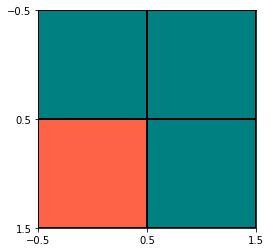

In [12]:
plota_quad([[0,0],[1,0]])

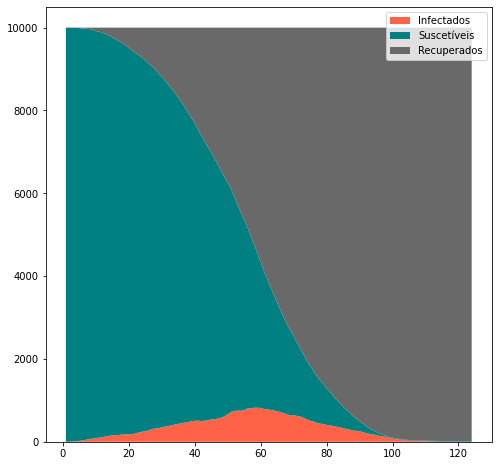

In [13]:
#Sistema
N = 100
populacao = np.zeros((N,N))
p_c = 1
p_r = 0.2

suscetiveis = np.array([N*N-1])
infectados = np.array([1])
recuperados = np.array([0])

populacao = cond_inic(populacao)

a = True

#Simulação
while a:
    #Passo temporal no qual verificamos novas contaminações
    populacao = evolui_contaminacao(populacao,p_c)
    
    sus = 0
    inf = 0
    rec = 0
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                sus += 1
            elif populacao[i][j] == 1:
                inf += 1 
            else:
                rec += 1
                
    #suscetiveis = np.append(suscetiveis,sus)
    #infectados = np.append(infectados,inf)
    #recuperados = np.append(recuperados,rec)
    
    #Passo temporal no qual verificamos recuperações
    populacao = evolui_recuperacao(populacao,p_r)
    
    #Condição de parada, se ainda houver alguém doente, a simulação continua
    a = False
    sus = 0
    inf = 0
    rec = 0
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                sus += 1
            elif populacao[i][j] == 1:
                inf += 1
                a = True 
            else:
                rec += 1
    suscetiveis = np.append(suscetiveis,sus)
    infectados = np.append(infectados,inf)
    recuperados = np.append(recuperados,rec)

plt.figure(figsize=(8,8))
plt.stackplot(np.linspace(1,len(suscetiveis),len(suscetiveis),endpoint=True),[infectados,suscetiveis,recuperados],labels=["Infectados","Suscetíveis","Recuperados"],colors=["tomato","teal","dimgrey"])
plt.legend()
plt.show()

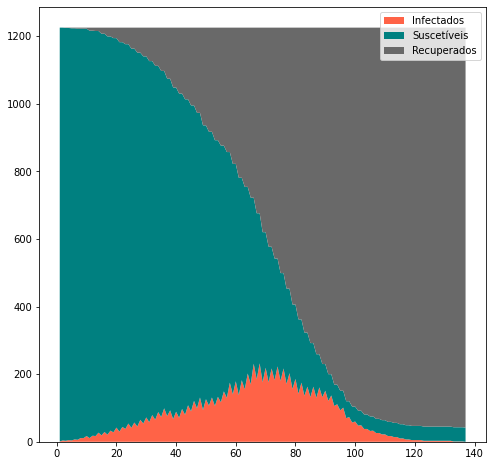

In [38]:
#Sistema
N = 35
populacao = np.zeros((N,N))
p_c = 0.5
p_r = 0.2

suscetiveis = np.array([N*N-1])
infectados = np.array([1])
recuperados = np.array([0])

populacao = cond_inic(populacao)

a = True

#Simulação
while a:
    #Passo temporal no qual verificamos novas contaminações
    populacao = evolui_contaminacao(populacao,p_c)
    
    sus = 0
    inf = 0
    rec = 0
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                sus += 1
            elif populacao[i][j] == 1:
                inf += 1 
            else:
                rec += 1
                
    plota_quad(populacao)
    time.sleep(0.3)
    display.clear_output(wait=True)
                
    suscetiveis = np.append(suscetiveis,sus)
    infectados = np.append(infectados,inf)
    recuperados = np.append(recuperados,rec)
    
    #Passo temporal no qual verificamos recuperações
    populacao = evolui_recuperacao(populacao,p_r)
    
    plota_quad(populacao)
    time.sleep(0.3)
    display.clear_output(wait=True)
    
    #Condição de parada, se ainda houver alguém doente, a simulação continua
    a = False
    sus = 0
    inf = 0
    rec = 0
    for i in range(N):
        for j in range(N):
            if populacao[i][j] == 0:
                sus += 1
            elif populacao[i][j] == 1:
                inf += 1
                a = True 
            else:
                rec += 1
    suscetiveis = np.append(suscetiveis,sus)
    infectados = np.append(infectados,inf)
    recuperados = np.append(recuperados,rec)

plt.figure(figsize=(8,8))
plt.stackplot(np.linspace(1,len(suscetiveis),len(suscetiveis),endpoint=True),[infectados,suscetiveis,recuperados],labels=["Infectados","Suscetíveis","Recuperados"],colors=["tomato","teal","dimgrey"])
plt.legend()
plt.show()

MÉDIAS

In [31]:
#Sistema
N = 50
p_c = 1
p_r = 0.2
simulacoes = 2

total_sus = np.array([])
total_inf = np.array([])
total_rec = np.array([])

for k in range(simulacoes):
    suscetiveis = np.array([N*N-1])
    infectados = np.array([1])
    recuperados = np.array([0])
    
    populacao = np.zeros((N,N))
    populacao = cond_inic(populacao)
    a = True

    #Simulação
    while a:
        #Passo temporal no qual verificamos novas contaminações
        populacao = evolui_contaminacao(populacao,p_c)

        sus = 0
        inf = 0
        rec = 0
        for i in range(N):
            for j in range(N):
                if populacao[i][j] == 0:
                    sus += 1
                elif populacao[i][j] == 1:
                    inf += 1 
                else:
                    rec += 1

        #suscetiveis = np.append(suscetiveis,sus)
        #infectados = np.append(infectados,inf)
        #recuperados = np.append(recuperados,rec)

        #Passo temporal no qual verificamos recuperações
        populacao = evolui_recuperacao(populacao,p_r)

        #Condição de parada, se ainda houver alguém doente, a simulação continua
        a = False
        sus = 0
        inf = 0
        rec = 0
        for i in range(N):
            for j in range(N):
                if populacao[i][j] == 0:
                    sus += 1
                elif populacao[i][j] == 1:
                    inf += 1
                    a = True 
                else:
                    rec += 1
        suscetiveis = np.append(suscetiveis,sus)
        infectados = np.append(infectados,inf)
        recuperados = np.append(recuperados,rec)
        
    total_sus = np.append(total_sus, suscetiveis)
    total_sus = np.append(total_sus, -len(suscetiveis))
    total_inf = np.append(total_inf, infectados)
    total_inf = np.append(total_inf, -len(suscetiveis))
    total_rec = np.append(total_rec, recuperados)
    total_rec = np.append(total_rec, -len(suscetiveis))

In [30]:
len_sus = int(abs(min(total_sus)))
len_inf = int(abs(min(total_inf)))
len_rec = int(abs(min(total_rec)))

aux_sus = np.empty((simulacoes,len_sus))
aux_inf = np.empty((simulacoes,len_inf))
aux_rec = np.empty((simulacoes,len_rec))

count = -1
for i in range(simulacoes):
    count += 1
    for j in range(len_sus):
        if total_inf[count] < 0 and total_inf[count] != -len_sus:
            count -= 1
            aux_sus[i][j] = total_sus[count]
            aux_inf[i][j] = total_inf[count]
            aux_rec[i][j] = total_rec[count]
            
        else:
            aux_sus[i][j] = total_sus[count]
            aux_inf[i][j] = total_inf[count]
            aux_rec[i][j] = total_rec[count]
        count += 1

In [79]:
print(aux_sus)

[[  9.99900000e+003   9.99900000e+003   9.99900000e+003   9.99900000e+003
    9.99900000e+003   9.99900000e+003   9.99900000e+003   9.99900000e+003
    9.99900000e+003   9.99900000e+003   9.99900000e+003   9.99900000e+003
    9.99900000e+003   9.99900000e+003   9.99900000e+003   9.99900000e+003
    9.99900000e+003   9.99900000e+003   9.99900000e+003   9.99900000e+003
    9.99900000e+003   9.99900000e+003   9.99900000e+003   9.99900000e+003
    9.99900000e+003   9.99900000e+003   9.99900000e+003   9.99900000e+003
    9.99900000e+003   9.99900000e+003   9.99900000e+003   9.99900000e+003
    9.99900000e+003   9.99900000e+003   9.99900000e+003   9.99900000e+003
    9.99900000e+003   9.99900000e+003   9.99900000e+003   9.99900000e+003
    9.99900000e+003   9.99900000e+003   9.99900000e+003   9.99900000e+003
    9.99900000e+003   9.99900000e+003   9.99900000e+003   9.99900000e+003
    9.99900000e+003   9.99900000e+003   9.99900000e+003   9.99900000e+003
    9.99900000e+003   9.99900000e+003 